## **Analisis Cluster Conectividad Provincias Peru**
---

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Cargar el dataset usando coma como separador
data = pd.read_csv('/content/cluster.csv', sep=';')


In [5]:
print(data.columns)


Index(['REGION', 'DEPARTAMENTO', 'PROVINCIA', 'TECNOLOGIAS', 'CONEXIONES',
       'PDEPARTAMENTO', 'PPROVINCIA', 'VELMEDS', 'VELMEDB'],
      dtype='object')


### **Resumen estadístico de las variables numéricas**

In [7]:
# Resumen estadístico de las variables numéricas
print(data[['CONEXIONES', 'PDEPARTAMENTO', 'PPROVINCIA', 'VELMEDS', 'VELMEDB']].describe())


         CONEXIONES  PDEPARTAMENTO    PPROVINCIA     VELMEDS     VELMEDB
count  1.960000e+02   1.960000e+02  1.960000e+02  196.000000  196.000000
mean   1.865300e+04   1.621664e+06  1.739786e+05   25.850190   31.844252
std    1.349022e+05   2.299544e+06  7.487652e+05   13.449422    9.692721
min    3.300000e+01   1.956700e+05  3.603000e+03    6.562500   12.687500
25%    1.580000e+02   6.818710e+05  2.838150e+04   14.689924   24.087538
50%    6.945000e+02   1.201463e+06  6.374950e+04   22.506505   31.180565
75%    4.678500e+03   1.438598e+06  1.206325e+05   33.528875   39.453271
max    1.862269e+06   1.125232e+07  1.024544e+07   62.811968   55.913952


### **Conexiones por Departamento**

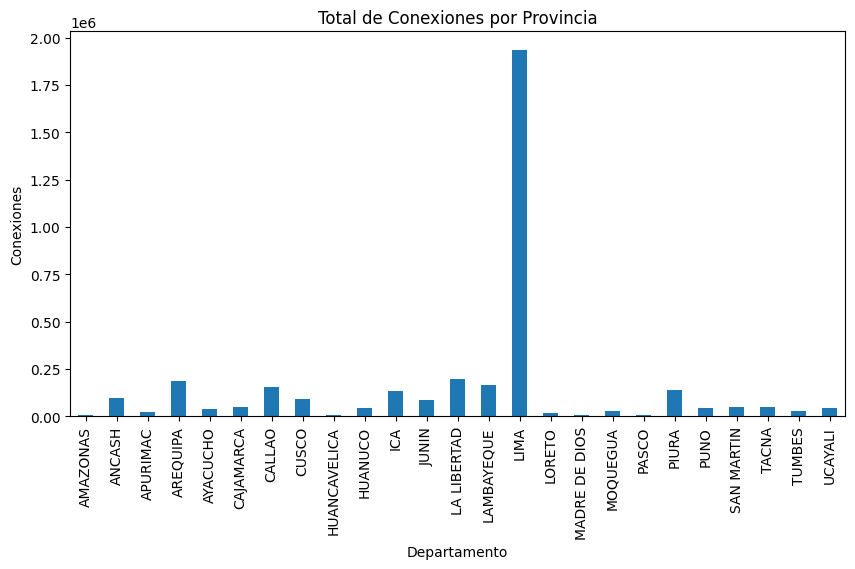

In [11]:
# Conexiones por Departamento
data.groupby('DEPARTAMENTO')['CONEXIONES'].sum().plot(kind='bar', figsize=(10, 5))
plt.title('Total de Conexiones por Provincia')
plt.xlabel('Departamento')
plt.ylabel('Conexiones')
plt.xticks(rotation=90)
plt.show()


### **Velocidad promedio de descarga (VELMEDS) por provincia**

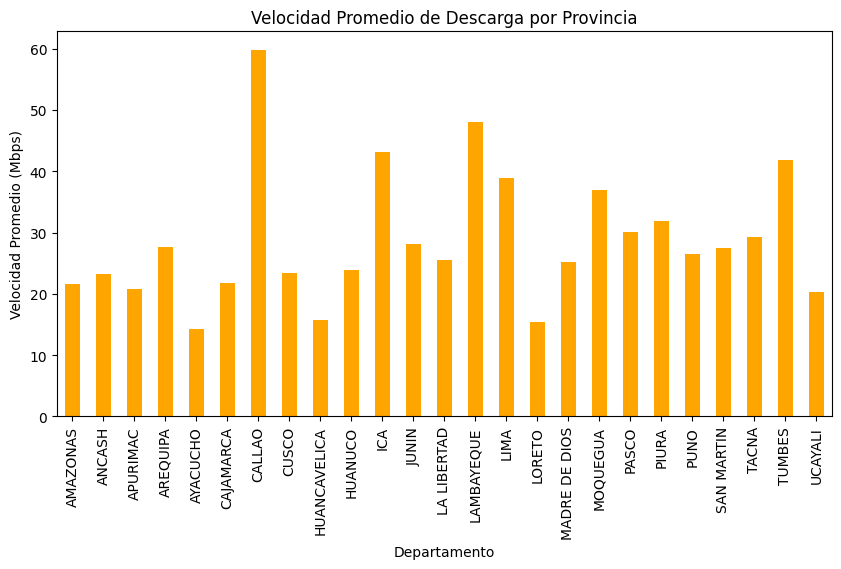

In [13]:

data.groupby('DEPARTAMENTO')['VELMEDS'].mean().plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Velocidad Promedio de Descarga por Provincia')
plt.xlabel('Departamento')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=90)
plt.show()

### **Matriz de correlación**


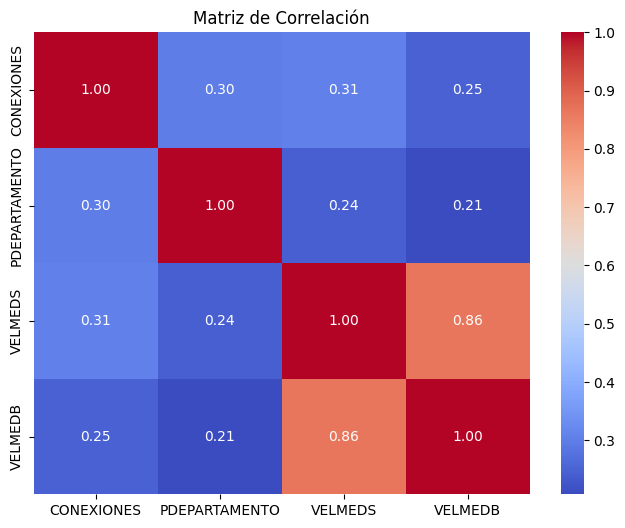

In [18]:
# Matriz de correlación
corr = data[['CONEXIONES', 'PDEPARTAMENTO', 'VELMEDS', 'VELMEDB']].corr()

# Mapa de calor de la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


### **Comparativa Velocidad media por departamento / Velocidad media por provincia**


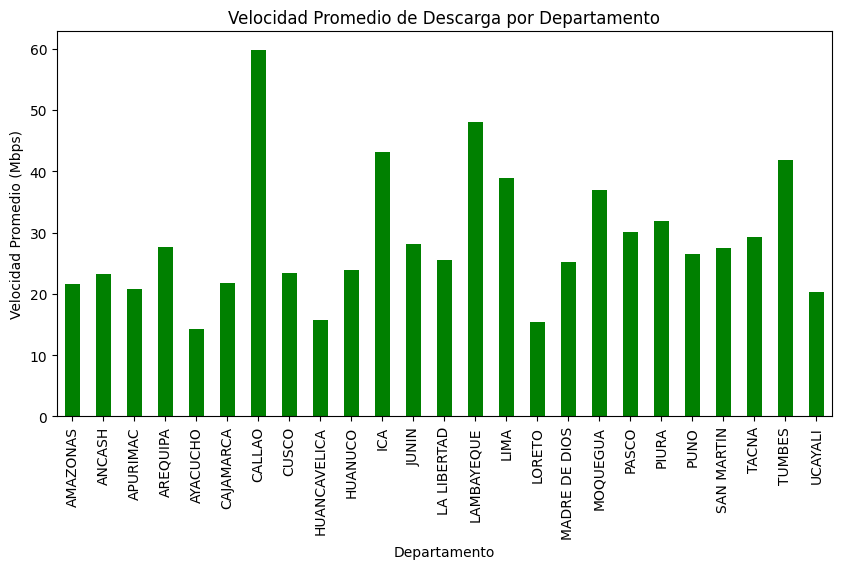

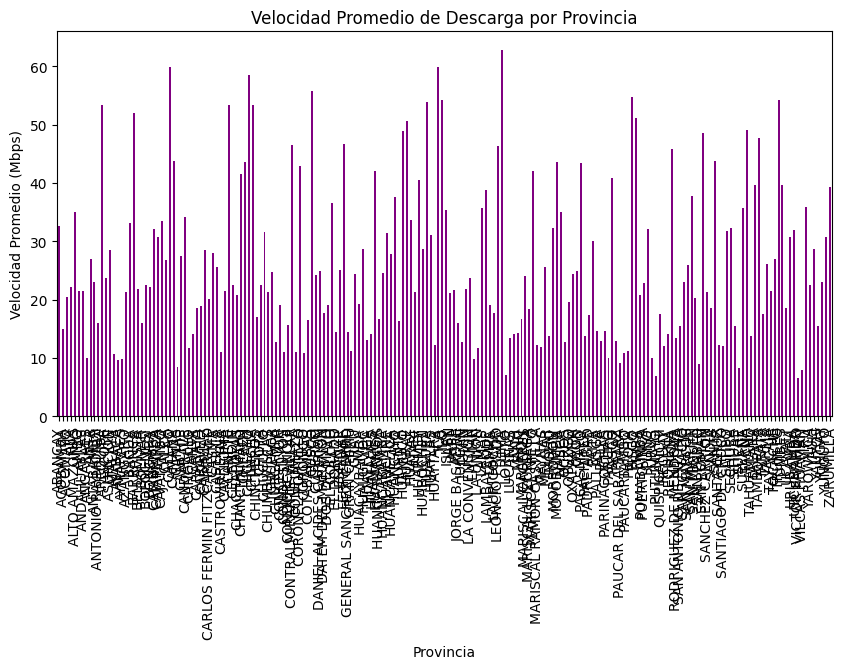

In [19]:
# Velocidad media por departamento
data.groupby('DEPARTAMENTO')['VELMEDS'].mean().plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Velocidad Promedio de Descarga por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=90)
plt.show()

# Velocidad media por provincia
data.groupby('PROVINCIA')['VELMEDS'].mean().plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Velocidad Promedio de Descarga por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


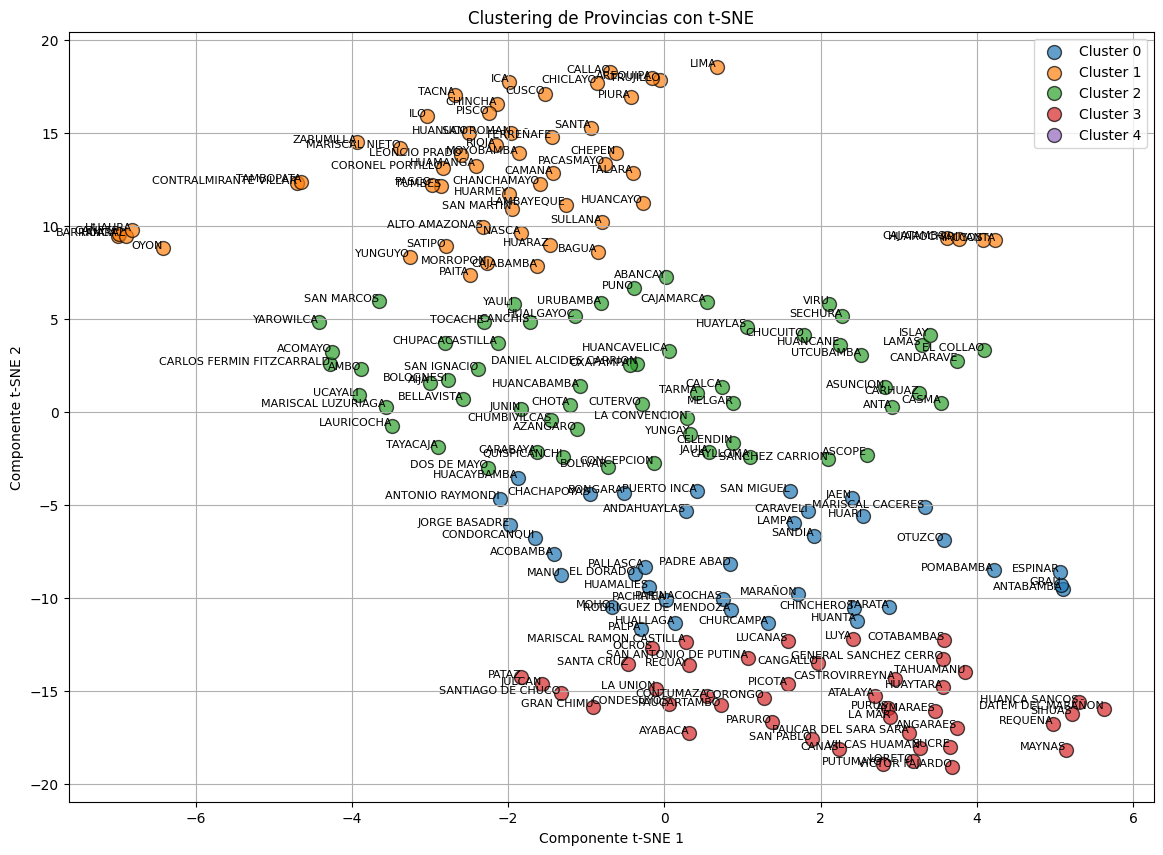

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Seleccionar las columnas relevantes para el clustering
X = data[['CONEXIONES', 'PDEPARTAMENTO', 'PPROVINCIA', 'VELMEDS', 'VELMEDB']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar t-SNE para reducción de dimensionalidad
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Aplicar K-means clustering en los datos reducidos por t-SNE
kmeans = KMeans(n_clusters=4, random_state=42)  # Cambia n_clusters a la cantidad de clusters que desees
data['Cluster'] = kmeans.fit_predict(X_tsne)

# Visualizar los clusters con t-SNE
plt.figure(figsize=(14, 10))
colors = plt.get_cmap('tab10').colors  # Paleta de colores más distinta

for cluster in range(5):  # Cambia el rango a la cantidad de clusters que desees
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(X_tsne[clustered_data.index, 0], X_tsne[clustered_data.index, 1],
                color=colors[cluster], label=f'Cluster {cluster}', edgecolor='k', s=100, alpha=0.7)

# Añadir nombres de provincias a los puntos
for i in range(len(data)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], data['PROVINCIA'][i], fontsize=8, ha='right')

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Clustering de Provincias con t-SNE')
plt.grid(True)
plt.legend()
plt.show()


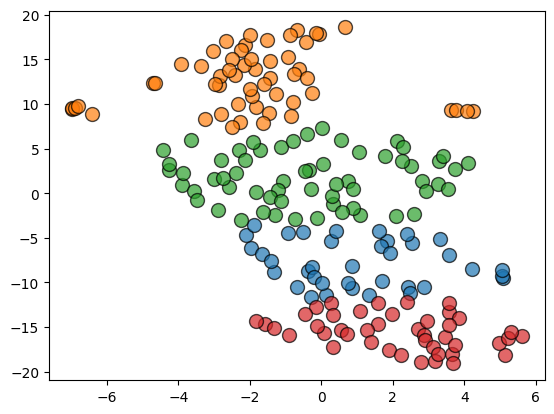

In [27]:
# Visualizar los clusters con t-SNE
colors = plt.get_cmap('tab10').colors  # Paleta de colores más distinta

for cluster in range(4):  # Cambia el rango a la cantidad de clusters que desees
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(X_tsne[clustered_data.index, 0], X_tsne[clustered_data.index, 1],
                color=colors[cluster], label=f'Cluster {cluster}', edgecolor='k', s=100, alpha=0.7)


In [26]:
# Seleccionar solo las columnas numéricas
numeric_columns = ['CONEXIONES', 'PDEPARTAMENTO', 'PPROVINCIA', 'VELMEDS', 'VELMEDB']

# Agrupar los datos por clúster y calcular la media solo de las columnas numéricas
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()

# Mostrar el resumen de las características numéricas por clúster
print(cluster_summary)


           CONEXIONES  PDEPARTAMENTO     PPROVINCIA    VELMEDS    VELMEDB
Cluster                                                                  
0         1001.621622   8.502253e+05   47782.756757  17.903462  26.420834
1        63046.454545   2.998093e+06  461147.636364  42.807567  42.980878
2         2254.311475   1.249796e+06   80887.754098  25.456310  33.668807
3          322.325581   1.052446e+06   47315.558140  11.557164  19.678071


**En las conclusiones preliminares, se pueden destacar los siguientes puntos clave sobre los cuatro clústeres analizados en términos de conectividad:**

Cluster 0 (azul):
Este clúster presenta un número relativamente bajo de conexiones y velocidades promedio tanto de descarga como de subida. Sin embargo, está en mejores condiciones que el Cluster 3 en términos de conectividad. Las áreas pertenecientes a este clúster podrían enfrentar desafíos para mantener una conectividad constante y de calidad aceptable, pero no están en una situación tan crítica.

Cluster 1 (naranja):
Es el clúster que representa las mejores condiciones de conectividad. Tiene el mayor número de conexiones y las velocidades medias más altas, tanto de descarga como de subida. Las provincias en este grupo están mejor equipadas para manejar las demandas tecnológicas actuales y futuras, lo que sugiere un buen nivel de acceso a servicios digitales y de internet.

Cluster 2 (verde):
Con un número moderado de conexiones y velocidades intermedias, este clúster parece representar una situación de conectividad en transición. Las provincias en este grupo están en una posición donde aún existen áreas de mejora, pero no enfrentan las mismas limitaciones severas que los clústeres 0 y 3. Podrían beneficiarse de políticas de inversión en infraestructura tecnológica.

Cluster 3 (rojo):
Este clúster muestra las condiciones más desfavorables en cuanto a conectividad, con el número de conexiones más bajo y velocidades promedio mucho menores que el resto de los clústeres. Las provincias agrupadas aquí se enfrentan a una clara brecha digital, lo que limita su acceso a oportunidades tecnológicas, educativas y económicas. Este grupo debe ser priorizado en términos de intervención y mejora de infraestructura para reducir la brecha digital en estas zonas.